In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We've talked about Random Forests. Now it's time to build one.

Here we'll use data from Lending Club to predict the state of a loan given some information about it. You can find the dataset [here](https://www.lendingclub.com/info/download-data.action). We'll use 2015 data. ([Thinkful mirror](https://www.dropbox.com/s/m7z42lubaiory33/LoanStats3d.csv?dl=0))

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
y2015.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,217133.000000,...,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,5.759576e+07,15240.285862,15240.285862,15234.156412,441.860087,7.696561e+04,19.195989,0.347397,0.572690,34.023391,...,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,1.013358e+07,8571.325901,8571.325901,8567.935752,244.851179,7.394996e+04,23.504038,0.927695,0.867776,21.990270,...,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,7.082500e+04,1000.000000,1000.000000,900.000000,23.400000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,4.922617e+07,8500.000000,8500.000000,8500.000000,263.930000,4.600000e+04,12.590000,0.000000,0.000000,15.000000,...,0.000000,1.000000,90.900000,15.400000,0.000000,0.000000,5.090900e+04,2.259850e+04,7800.000000,1.548150e+04
50%,5.895358e+07,14000.000000,14000.000000,14000.000000,385.410000,6.500000e+04,18.600000,0.000000,0.000000,31.000000,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,1.114050e+05,3.959600e+04,15200.000000,3.297000e+04
75%,6.604584e+07,20000.000000,20000.000000,20000.000000,578.790000,9.169050e+04,25.340000,0.000000,1.000000,50.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.496290e+05,6.565100e+04,28600.000000,5.829900e+04
max,7.354484e+07,35000.000000,35000.000000,35000.000000,1445.460000,9.500000e+06,9999.000000,39.000000,6.000000,176.000000,...,39.000000,30.000000,100.000000,100.000000,11.000000,85.000000,9.999999e+06,2.921551e+06,834300.000000,2.101913e+06


In [12]:
# pd.set_option('display.height', 1000)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# Display all columns:
pd.set_option('display.max_rows', 500)
y2015.dtypes

id                                 object
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [15]:
y2015['term'].value_counts()
y2015['grade'].value_counts()

C    120567
B    117606
A     73336
D     62654
E     34948
F      9817
G      2167
Name: grade, dtype: int64

## The Blind Approach

Now, as we've seen before, creating a model is the easy part. Let's try just using everything we've got and throwing it without much thought into a Random Forest. SKLearn requires the independent variables to be be numeric, and all we want is dummy variables so let's use `get_dummies` from Pandas to generate a dummy variable for every categorical colummn and see what happens off of this kind of naive approach.

In [18]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

# ... result is MemoryError:

MemoryError: 

Did your kernel die? My kernel died.

Guess it isn't always going to be that easy...

Can you think of what went wrong?

(You're going to have to reset your kernel and reload the column, BUT DON'T RUN THE MODEL AGAIN OR YOU'LL CRASH THE KERNEL AGAIN!)

## Data Cleaning

Well, `get_dummies` can be a very memory intensive thing, particularly if data are typed poorly. We got a warning about that earlier. Mixed data types get converted to objects, and that could create huge problems. Our dataset is about 400,000 rows. If there's a bad type there its going to see 400,000 distinct values and try to create dummies for all of them. That's bad. Lets look at all our categorical variables and see how many distinct counts there are...

In [24]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print('Column name:',i ,' \t\t/ Unique values:', column.nunique())

Column name: id  		/ Unique values: 421097
Column name: term  		/ Unique values: 2
Column name: int_rate  		/ Unique values: 110
Column name: grade  		/ Unique values: 7
Column name: sub_grade  		/ Unique values: 35
Column name: emp_title  		/ Unique values: 120812
Column name: emp_length  		/ Unique values: 11
Column name: home_ownership  		/ Unique values: 4
Column name: verification_status  		/ Unique values: 3
Column name: issue_d  		/ Unique values: 12
Column name: loan_status  		/ Unique values: 7
Column name: pymnt_plan  		/ Unique values: 1
Column name: url  		/ Unique values: 421095
Column name: desc  		/ Unique values: 34
Column name: purpose  		/ Unique values: 14
Column name: title  		/ Unique values: 27
Column name: zip_code  		/ Unique values: 914
Column name: addr_state  		/ Unique values: 49
Column name: earliest_cr_line  		/ Unique values: 668
Column name: revol_util  		/ Unique values: 1211
Column name: initial_list_status  		/ Unique values: 2
Column name: last_pymnt

Well that right there is what's called a problem. Some of these have over a hundred thousand distinct types. Lets drop the ones with over 30 unique values, converting to numeric where it makes sense. In doing this there's a lot of code that gets written to just see if the numeric conversion makes sense. It's a manual process that we'll abstract away and just include the conversion.

You could extract numeric features from the dates, but here we'll just drop them. There's a lot of data, it shouldn't be a huge problem.

In [25]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

Wonder what was causing the dtype error on the id column, which _should_ have all been integers? Let's look at the end of the file.

In [26]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

Now this should be better. Let's try again.

In [28]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.00,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.00,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.00,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.00,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.00,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.00,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.00,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.00,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.00,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.00,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


It finally works! We had to sacrifice sub grade, state address and description, but that's fine. If you want to include them you could run the dummies independently and then append them back to the dataframe.

## Second Attempt

Now let's try this model again.

We're also going to drop NA columns, rather than impute, because our data is rich enough that we can probably get away with it.

This model may take a few minutes to run.

In [29]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.97967277, 0.98031393, 0.98121631, 0.98147752, 0.97653764,
       0.9760152 , 0.96155216, 0.98059797, 0.98026456, 0.98071534])

The score cross validation reports is the accuracy of the tree. Here we're about 98% accurate.

That works pretty well, but there are a few potential problems. Firstly, we didn't really do much in the way of feature selection or model refinement. As such there are a lot of features in there that we don't really need. Some of them are actually quite impressively useless.

There's also some variance in the scores. The fact that one gave us only 93% accuracy while others gave higher than 98 is concerning. This variance could be corrected by increasing the number of estimators. That will make it take even longer to run, however, and it is already quite slow.

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [ ]:
# Your code here.



## Correlation matrix

Select only numeric columns:

In [89]:
values_cols = y2015.select_dtypes(include=['number'])#.columns

In [90]:
print(len(values_cols.columns))
values_cols.dtypes

87


id                                float64
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
int_rate                          float64
installment                       float64
annual_inc                        float64
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                          float64
pub_rec                           float64
revol_bal                         float64
total_acc                         float64
out_prncp                         float64
out_prncp_inv                     float64
total_pymnt                       float64
total_pymnt_inv                   float64
total_rec_prncp                   float64
total_rec_int                     float64
total_rec_late_fee                

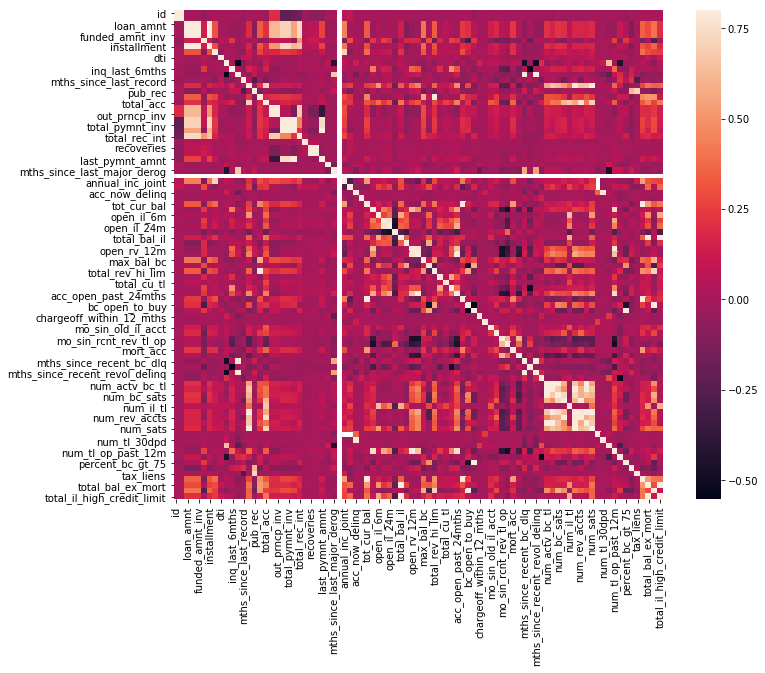

In [92]:
import seaborn as sns
corrmat = values_cols.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


There are some columns that are highly corraleted, but the majority of them are at moderately.

In [93]:
print(corrmat)

                                      id  member_id  loan_amnt  funded_amnt  \
id                              1.000000   0.997540  -0.008288    -0.008288   
member_id                       0.997540   1.000000  -0.008620    -0.008620   
loan_amnt                      -0.008288  -0.008620   1.000000     1.000000   
funded_amnt                    -0.008288  -0.008620   1.000000     1.000000   
funded_amnt_inv                -0.008554  -0.008885   0.999994     0.999994   
int_rate                       -0.053402  -0.053447   0.140572     0.140572   
installment                    -0.012919  -0.013274   0.941205     0.941205   
annual_inc                      0.015055   0.014958   0.305734     0.305734   
dti                             0.005692   0.005806   0.006103     0.006103   
delinq_2yrs                     0.002300   0.002261  -0.010424    -0.010424   
inq_last_6mths                  0.000660   0.000715  -0.039040    -0.039040   
mths_since_last_delinq          0.006322   0.006186 

In [34]:
print(len(y2015.columns))
y2015.dtypes

103


id                                float64
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
purpose                            object
title                              object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                          

### Try PCA

In [35]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

from sklearn.preprocessing import StandardScaler  

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X_pca = StandardScaler().fit_transform(X)

In [37]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA 

sklearn_pca = PCA(n_components = len(X.columns) )
Y_sklearn = sklearn_pca.fit_transform(X_pca)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    np.round(sklearn_pca.explained_variance_ratio_,3)
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.054 0.031 0.03  0.024 0.019 0.016 0.016 0.015 0.013 0.013 0.012 0.011
 0.011 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.009 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.007
 0.007 0.007 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.001 0.001 0.001

### There are a lot of features that explain a small part of the variation of the initial features!

Below we'll see which one should be kept or not.

In [38]:
# What are the numbers of the eigenvalues?
pca = PCA()
eigenvalues = sklearn_pca.explained_variance_
eigenvalues

array([1.07424274e+01, 6.17082352e+00, 5.97206210e+00, 4.73791190e+00,
       3.77564364e+00, 3.21357484e+00, 3.14702889e+00, 2.92371680e+00,
       2.62559544e+00, 2.56554441e+00, 2.32939154e+00, 2.24159049e+00,
       2.11726950e+00, 2.06220462e+00, 2.04268761e+00, 2.02265265e+00,
       2.01611188e+00, 2.01117818e+00, 2.00560628e+00, 2.00122713e+00,
       1.99577194e+00, 1.96360284e+00, 1.94225088e+00, 1.89177850e+00,
       1.77381987e+00, 1.65788191e+00, 1.60949220e+00, 1.51957843e+00,
       1.50153670e+00, 1.47345274e+00, 1.44496490e+00, 1.42930440e+00,
       1.40904602e+00, 1.39792879e+00, 1.37702578e+00, 1.37247939e+00,
       1.35979889e+00, 1.35164114e+00, 1.33105349e+00, 1.32561071e+00,
       1.30940566e+00, 1.29908796e+00, 1.29159919e+00, 1.27829701e+00,
       1.26906151e+00, 1.26102200e+00, 1.24786251e+00, 1.24380415e+00,
       1.23096246e+00, 1.21689347e+00, 1.19326370e+00, 1.18597311e+00,
       1.17066049e+00, 1.16483074e+00, 1.15885066e+00, 1.15696673e+00,
      

Upon visual inspection, the analyst will keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow":

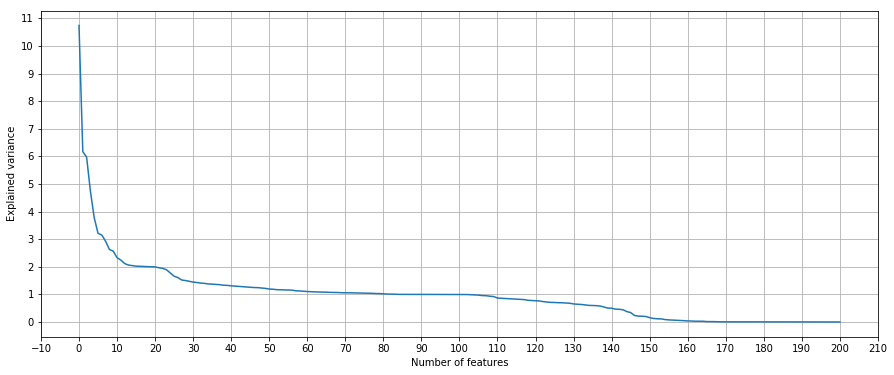

In [68]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.locator_params(axis='x', nbins=40)
plt.locator_params(axis='y', nbins=20)

plt.plot(eigenvalues)
plt.xlabel('Number of features')
plt.ylabel('Explained variance')
plt.show()

### We can try with the first 6 features created by PCA:

In [117]:
principalDf = pd.DataFrame(data = Y_sklearn[:,0:6]
             #, columns = ['PCA1', 'PCA2','PCA3', 'PCA4','PCA5']
                          )
principalDf.head()


,0,1,2,3,4,5
0,3.867065,2.671518,-3.081659,2.930448,-1.741146,2.056280
1,-3.276562,0.168455,-2.272507,3.181289,-0.668735,2.046225
2,2.562346,-4.149522,1.671445,3.544935,0.309448,-0.764226
3,4.190863,0.562429,-2.972087,2.319189,-1.114637,-1.677558
4,-0.337965,4.030783,5.315590,-3.933929,1.070851,2.648806


In [118]:
principalDf = pd.concat((principalDf , y2015['loan_status']),axis=1)

In [119]:
principalDf.head()

,0,1,2,3,4,5,loan_status
0,3.867065,2.671518,-3.081659,2.930448,-1.741146,2.056280,Current
1,-3.276562,0.168455,-2.272507,3.181289,-0.668735,2.046225,Current
2,2.562346,-4.149522,1.671445,3.544935,0.309448,-0.764226,Fully Paid
3,4.190863,0.562429,-2.972087,2.319189,-1.114637,-1.677558,Current
4,-0.337965,4.030783,5.315590,-3.933929,1.070851,2.648806,Fully Paid


### Third attempt but with PCA:

In [120]:
#6
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = principalDf.drop('loan_status', axis=1)
Y = principalDf['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val = cross_val_score(rfc, X, Y, cv=10)
print(cross_val)

[0.8781791  0.90097599 0.90933485 0.90995227 0.90902398 0.90816908
 0.90987675 0.90602959 0.90113283 0.87749964]


In [121]:
print('Average value for CV = ',np.round(np.mean(cross_val),3))

Average value for CV =  0.901


### With 6 features resulted from PCA we've reached a value closer to 90%.